In [2]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [11]:
df=pd.read_csv("heart_attack.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


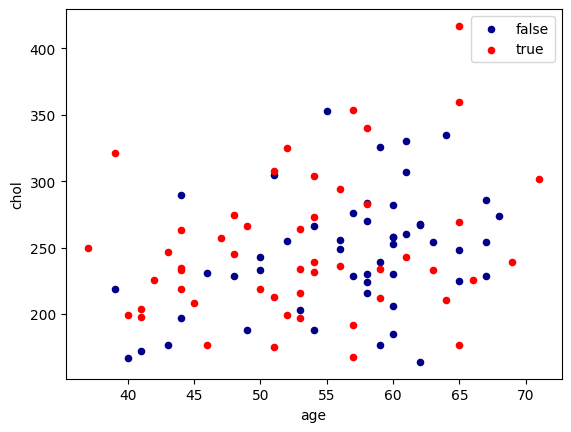

In [17]:
ax=df[df['output']==0][0:50].plot(kind='scatter',x='age',y='chol',color='DarkBlue',label='false',);
df[df['output']==1][0:50].plot(kind='scatter',x='age',y='chol',color='Red',label='true',ax=ax);
plt.show()

In [18]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [22]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [23]:
feature_df=df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
'exng', 'oldpeak', 'slp', 'caa', 'thall']]
x=np.asarray(feature_df)
x[0:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [26]:
y=np.asarray(df['output'])
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [28]:
x_train , x_test, y_train ,y_test = train_test_split(x,y,test_size=0.2,random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


In [68]:
# from sklearn import svm
# klist=['linear', 'poly', 'rbf', 'sigmoid'] 
# for krnl in klist :
#     print(krnl,":")
#     clf=svm.SVC(kernel=krnl)
#     clf.fit(x_train, y_train)
#     yhat=clf.predict(x_test)
#     from sklearn.metrics import f1_score
#     f1=f1_score(y_test, yhat, average='weighted')
#     print(f1)
     


linear :
0.9177578060193311
poly :
0.7148771083197313
rbf :
0.6511395441823271
sigmoid :
0.4380598276153456


In [74]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train) 

SVC(kernel='linear')

In [75]:
yhat=clf.predict(x_test)
print("y test : ",y_test[0:5])
print("yhat : " ,yhat[0:5])

y test :  [1 0 1 1 0]
yhat :  [1 0 1 1 1]


In [76]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [77]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
   

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        25
           1       0.92      0.94      0.93        36

    accuracy                           0.92        61
   macro avg       0.92      0.91      0.91        61
weighted avg       0.92      0.92      0.92        61

Confusion matrix, without normalization
[[22  3]
 [ 2 34]]


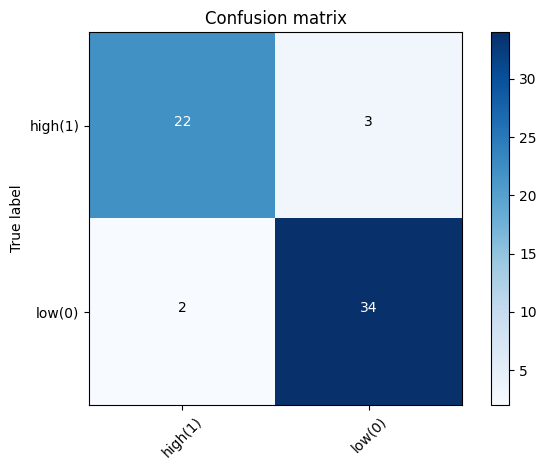

In [78]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['high(1)','low(0)'],normalize= False,  title='Confusion matrix')

In [79]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.9177578060193311

In [81]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.8148148148148148